The grammar is the same as before.

Now, we can ouput AST in bussproof style.

In [1]:
from arith_parse import *

def testParser(input_text, showOption='polish', showOperType=False):
  # showOption ::= 'polish' | 'RPN' | 'infix_latex' | 'tree'
  # showOperType has effect only when showOption == 'polish' or 'RPN'
  from IPython.display import display, Math

  try:
    ast = parse_text(input_text)
  except ValueError as e:
    print(f"ValueError: {e}")
  except SyntaxError as e:
    print(f"SyntaxError: {e}")
  else:
    if showOption=='polish':
      print(ast.build_polish_notation(showOperType))
    elif showOption=='RPN':
      print(ast.build_RPN(showOperType))
    elif showOption=='infix_latex':
      s = ast.build_infix_latex()
      print(s)
      display(Math(f"${s}$"))
    elif showOption=='tree':
      ast.draw_tree()
    else:
      raise ValueError(f"Invalid showOption: {showOption}")

In [2]:
testParser("a + b * c - d", showOption='RPN')
testParser("a + b * c - d", showOption='RPN', showOperType=True)
testParser("a + f(sin(a),max(b, -a/b'! + 3), 12)", showOption='RPN')
testParser("a + f(sin(a),max(b, -a/b'! + 3), 12)", showOption='infix_latex')
testParser("a + f(sin(a),max(b, (-a/b'! + 3)), 12)", showOption='infix_latex')

a b c * + d -
a(identifier) b(identifier) c(identifier) *(op_bin_2) +(op_bin_1) d(identifier) -(op_bin_1)
a a sin b a b ' ! / - 3 + max 12 f +
a + f(\operatorname{sin}(a), \operatorname{max}(b, -a / b'! + 3), 12)


<IPython.core.display.Math object>

a + f(\operatorname{sin}(a), \operatorname{max}(b, -a / b'! + 3), 12)


<IPython.core.display.Math object>

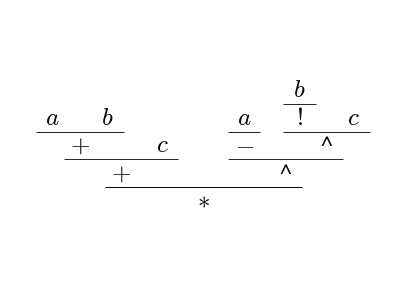

In [3]:
testParser("(a + b + c) * (-a) ^ b! ^ c", showOption='tree')